# K-Mean Algorithm by Numpy
Author Yuan Huang

This notebook implemented K-mean algorithm using numpy and scipy.spatial.distance packages. The notebook also investigated and compared the clustering of 3 different cases where the data points in each cluster on the two dimensional space are: non-correlated (spherically distributed), correlated to some extent, and highly correlated, respectively. Results showed that K-Mean is effective for spherically distributed data, but for non-spherical distributed data, it misclassified many data points. Actually, this is one of the limitations of K-mean: it is sensitive to the distributions of the data poitns in clusters. 

In this notebook, K-mean algorithm is implemented as the following: the algorithm first initialized cluster centers by randomly sampling k observations, where k is the number of clusters, from the feature matrix, then cluster the observations using the following two steps:
1. assign each observations to the closest center
2. redefine centers by averaging the features of all the observations assigned to each center

First, import numpy, scipy.spatial.distanceand and random packages

In [2]:
import numpy as np
import pandas as pd
import random
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
%matplotlib inline

The following are several import functions I used in this notebook:
1. random.sample(size, n): This function randomly select n unique numbers in the range between 1 and size. I used this function to randomly select k centers from the entire feature matrix observations.
2. cdist(arr1,arr2) returns a matrix with a dimension of len(arr1) times len(arr2). Element[i][j] corresponds to the distance between the ith element in arr1 and jth element in arr2.
3. norm(x,y): returns the euclidean distance between x and y

In [101]:
import numpy as np
from scipy.spatial.distance import cdist
from numpy.linalg import norm
import random as rm

class k_means(object):
    def __init__(self,k=2,esp=1e-5):
        """
        This function initialize the k centers by
        randomly sampling k observations from the feature matrix
        
        Inputs:
          k: number of clusters
          esp: the precision required for converge
        """
        self.centers=None
        self.k=k
        self.esp=esp
        
    def fit(self,X, iters=500):
        """
        This function fit the feature matrix usign K-mean algorithm.
        Define the cluster centers and assign each observation to 
        one of the k clusters.
        
        Inputs:
          X: feature matrix. 
          iters: the maximum number of iterations
        Outputs:
          set the cluster centers as self.centers
          and return the cluster labels as a vector
        """
        
        # convert X matrix to np.ndarray
        if not isinstance(X,np.ndarray):
            X=np.array(X)
            
        #randomly select k observations as the initial centers    
        self.centers=X[rm.sample(range(X.shape[0]),self.k)]
        
        # initialize flag, label and iter_time for the following iteration loop
        flag=True
        label=None
        iter_time=0
        
        
        # repeating loop if cluster centers are not converged,
        # and the number of iterations < iters. Otherwise, break the loop
        # and return the labels
        
        while flag and iter_time<iters:
            iter_time+=1
            flag=False
            dists=cdist(X,self.centers)
            labels=np.argmin(dists,axis=1)
            for i in range(self.k):
                new_center=X[labels==i].mean()
                if norm(new_center-self.centers[i]) >self.esp:
                    flag=True
                self.centers[i]=new_center
        return labels        
            

Now, let's generate some data and test the k-mean clustering method!
I will start from the easiest case: 3 well separated clusters of mutivariate normal distributions with spherical distribution (or diagonal covariance matrix) on the two dimensional space. These data points are plot as below:

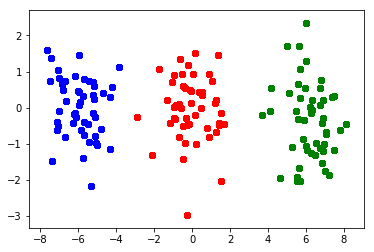

In [120]:
mean1=[0,0]
cov1=[[1,0],[0,1.0]]
cluster1 = np.random.multivariate_normal(mean1, cov1, 50)

mean2=[6,0]
cov2=[[1,0],[0,1.0]]
cluster2 = np.random.multivariate_normal(mean2, cov2, 50)

mean3=[-6,0]
cov3=[[1,0],[0,1.0]]
cluster3 = np.random.multivariate_normal(mean3, cov3, 50)

total=np.vstack([cluster1,cluster2,cluster3])
total_plot_data=np.hsplit(total,2)

colors=np.repeat([0,1,2],50)
cmap=['r','g','b']

for c in colors:
    plt.scatter(total_plot_data[0][colors==c],total_plot_data[1][colors==c],color=cmap[c])

Now we cluster these points using k-mean:

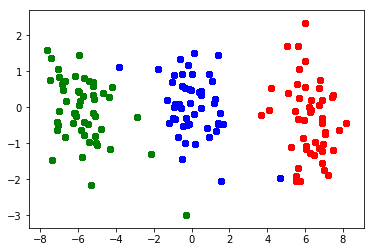

In [121]:
kmean=k_means(k=3)
labels=kmean.fit(total)

for c in labels:
    plt.scatter(total_plot_data[0][labels==c],total_plot_data[1][labels==c],color=cmap[c])

We can see that K-mean algorithm did a pretty good job in clustering the points with only two data points mis-classified. Now, let's see a more challenging case where the data points in each cluster are not distributed so "spherical", as indicated by the non-zero elements on the off-diagonal poistions of their covariance matrices:

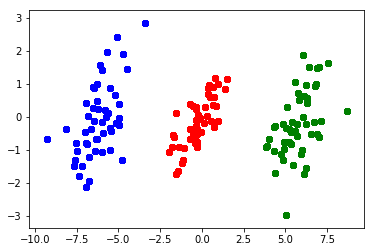

In [124]:
import matplotlib.pyplot as plt
mean1=[0,0]
cov1=[[1,0.8],[0.8,1.0]]
cluster1 = np.random.multivariate_normal(mean1, cov1, 50)

mean2=[6,0]
cov2=[[1,0.6],[0.6,1.0]]
cluster2 = np.random.multivariate_normal(mean2, cov2, 50)

mean3=[-6,0]
cov3=[[1,0.4],[0.4,1.0]]
cluster3 = np.random.multivariate_normal(mean3, cov3, 50)

total=np.vstack([cluster1,cluster2,cluster3])
total_plot_data=np.hsplit(total,2)

colors=np.repeat([0,1,2],50)
cmap=['r','g','b']

for c in colors:
    plt.scatter(total_plot_data[0][colors==c],total_plot_data[1][colors==c],color=cmap[c])

It seems that the data points are very well separated into three clusters. Now let's see if K-means can find the right clusters!

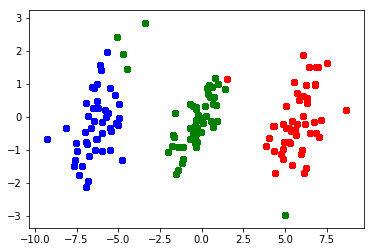

In [125]:
kmean=k_means(k=3)
labels=kmean.fit(total)

for c in labels:
    plt.scatter(total_plot_data[0][labels==c],total_plot_data[1][labels==c],color=cmap[c])

For these not very spherically distributed cluster points, K-Means misclassified more points compared to the spherical case even though the 3 clusters are separated pretty well. Now, let's look at another case where the x and y dimensions of the points in each cluster are more correlated.

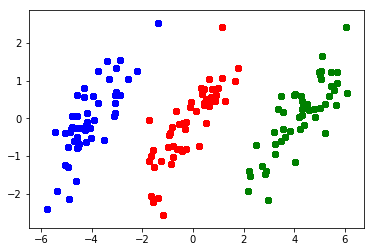

In [126]:
mean1=[0,0]
cov1=[[1,0.8],[0.8,1.0]]
cluster1 = np.random.multivariate_normal(mean1, cov1, 50)

mean2=[4,0]
cov2=[[1,0.8],[0.8,1.0]]
cluster2 = np.random.multivariate_normal(mean2, cov2, 50)

mean3=[-4,0]
cov3=[[1,0.8],[0.8,1.0]]
cluster3 = np.random.multivariate_normal(mean3, cov3, 50)

total=np.vstack([cluster1,cluster2,cluster3])
total_plot_data=np.hsplit(total,2)

colors=np.repeat([0,1,2],50)
cmap=['r','g','b']

for c in colors:
    plt.scatter(total_plot_data[0][colors==c],total_plot_data[1][colors==c],color=cmap[c])

Again, the 3 clusters seem to be very well separated. Now let's apply K-Means algorithm to these data!

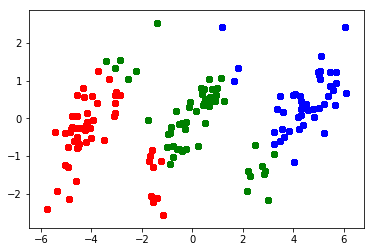

In [127]:
kmean=k_means(k=3)
labels=kmean.fit(total)

for c in labels:
    plt.scatter(total_plot_data[0][labels==c],total_plot_data[1][labels==c],color=cmap[c])

We can see that for these clusters containing non-spherical distributed data points (x and y dimensions highly correlated), K-Means can not effectively cluster the data points to the correct clusters.

# Conclusions:
1. K-Mean cluster algorithm was implemented using numpy and scipy
2. Based on multivariate normal distribution data generated by simulations, K-means is effective in clustering spherical distributed data, but mis-classifies many data points when different dimensions of the data are highly correlated